# BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES
## Kavinda P.D.D - IT17018210

## **CONTENT**

        1. IMPORTING DATA
        2. EXPLORING DATA
        3. DATA PREPROCESSING
        4. DATA VISUALIZATION
        5. MODEL TRAINING
        6. MODEL EVALUATION
        7. IMPROVING THE MODEL




**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign


DATASET : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data


## 1. IMPORTING DATA

#### Import all the libraries required.

In [241]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import sklearn.metrics as sm # includes score functions, performance metrics and pairwise metrics and distance computations.
%matplotlib inline

In [242]:
# Print the versions
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sns.__version__)

1.18.1
1.0.3
3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
0.10.0


In [243]:
df_brcancer = pd.read_csv("data.csv")
df_brcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08,nan


# 2. EXPLORING DATA

In [244]:
# Key values in the dictionary
df_brcancer.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'], dtype='object')

In [245]:
# Frequency of unique values of target variable
df_brcancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [246]:
# View all the target data
print(df_brcancer['diagnosis'])

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [247]:
# (Rows, Coulnms)
df_brcancer.shape

(569, 33)

In [248]:
df_brcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12,nan
1,842517,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09,nan
2,84300903,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09,nan
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,nan
4,84358402,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08,nan


In [249]:
df_brcancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,"1,479.00",0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,"2,027.00",0.14,0.21,0.41,0.22,0.21,0.07,nan
565,926682,M,20.13,28.25,131.20,"1,261.00",0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,"1,731.00",0.12,0.19,0.32,0.16,0.26,0.07,nan
566,926954,M,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,"1,124.00",0.11,0.31,0.34,0.14,0.22,0.08,nan
567,927241,M,20.60,29.33,140.10,"1,265.00",0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,"1,821.00",0.17,0.87,0.94,0.27,0.41,0.12,nan
568,92751,B,7.76,24.54,47.92,181.00,0.05,0.04,0.00,0.00,0.16,0.06,0.39,1.43,2.55,19.15,0.01,0.00,0.00,0.00,0.03,0.00,9.46,30.37,59.16,268.60,0.09,0.06,0.00,0.00,0.29,0.07,nan


## 3. DATA PREPROCESSING

In [250]:
# View data info
df_brcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [251]:
# Check for null values
df_brcancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [252]:
# Checking if any duplicates in "id" column by finding unique values and if their frequency is greater than 1
df_brcancer.id.value_counts().unique()

array([1])

In [253]:
# Since "id" column has no direct impact on target value (just patient id or index)
df_brcancer.drop('id',axis=1,inplace=True)
df_brcancer.drop('Unnamed: 32',axis=1,inplace=True)

In [254]:
df_brcancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], dtype='object')

In [255]:
# Checking if any duplicate values in the df
df_brcancer.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [256]:
# To check presence of missing (NaN) values
df_brcancer.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [257]:
df_brcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,M,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,M,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,M,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08


In [258]:
# Mapping string value feature to numerical value feature using map function
cancer_mapping = {'B':0, 'M':1}
df_brcancer.diagnosis = df_brcancer.diagnosis.map(cancer_mapping)
df_brcancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,1,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,1,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08


In [259]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df_brcancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,0.41,1.22,2.87,40.34,0.01,0.03,0.03,0.01,0.02,0.00,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,0.28,0.55,2.02,45.49,0.00,0.02,0.03,0.01,0.01,0.00,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,0.23,0.83,1.61,17.85,0.01,0.01,0.02,0.01,0.02,0.00,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,0.32,1.11,2.29,24.53,0.01,0.02,0.03,0.01,0.02,0.00,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,0.48,1.47,3.36,45.19,0.01,0.03,0.04,0.01,0.02,0.00,18.79,29.72,125.40,"1,084.00",0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,"2,501.00",0.16,0.35,0.43,0.20,0.30,0.10,2.87,4.88,21.98,542.20,0.03,0.14,0.40,0.05,0.08,0.03,36.04,49.54,251.20,"4,254.00",0.22,1.06,1.25,0.29,0.66,0.21


# 4. VISUALIZING THE DATA

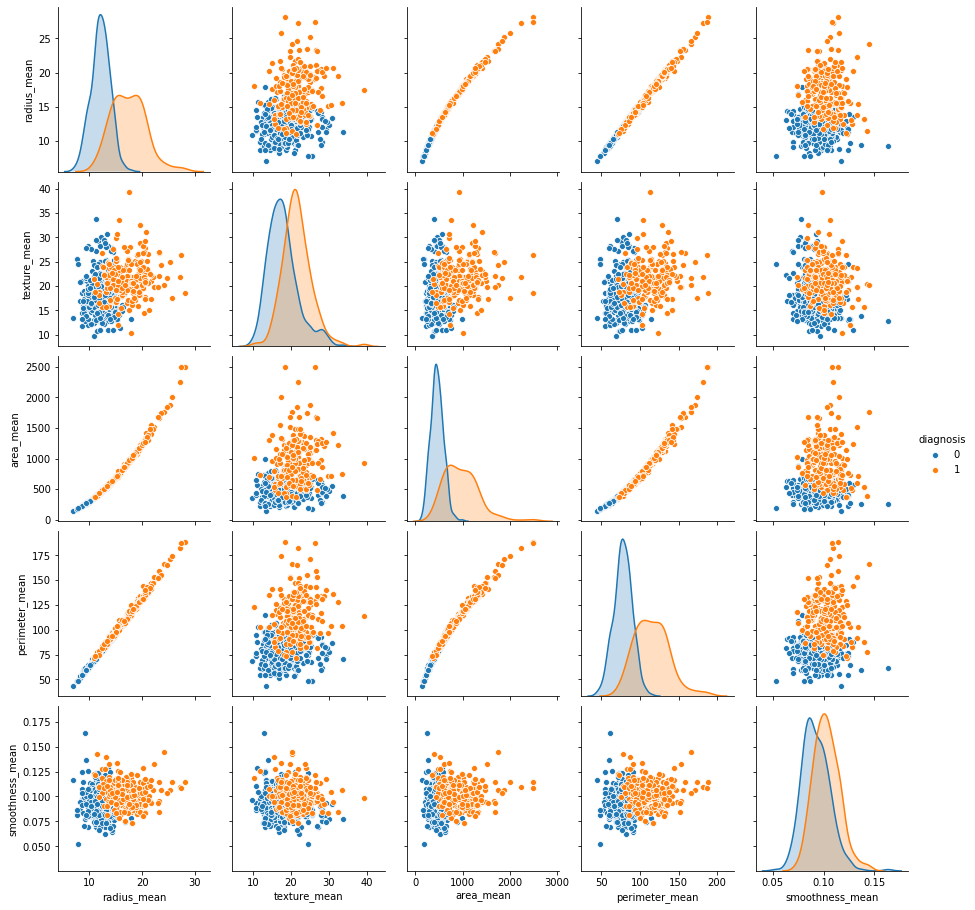

In [260]:
# Visualising selected features by target:
sns.pairplot(df_brcancer, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean', 'smoothness_mean'] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2befaa90>,
      dtype=object)

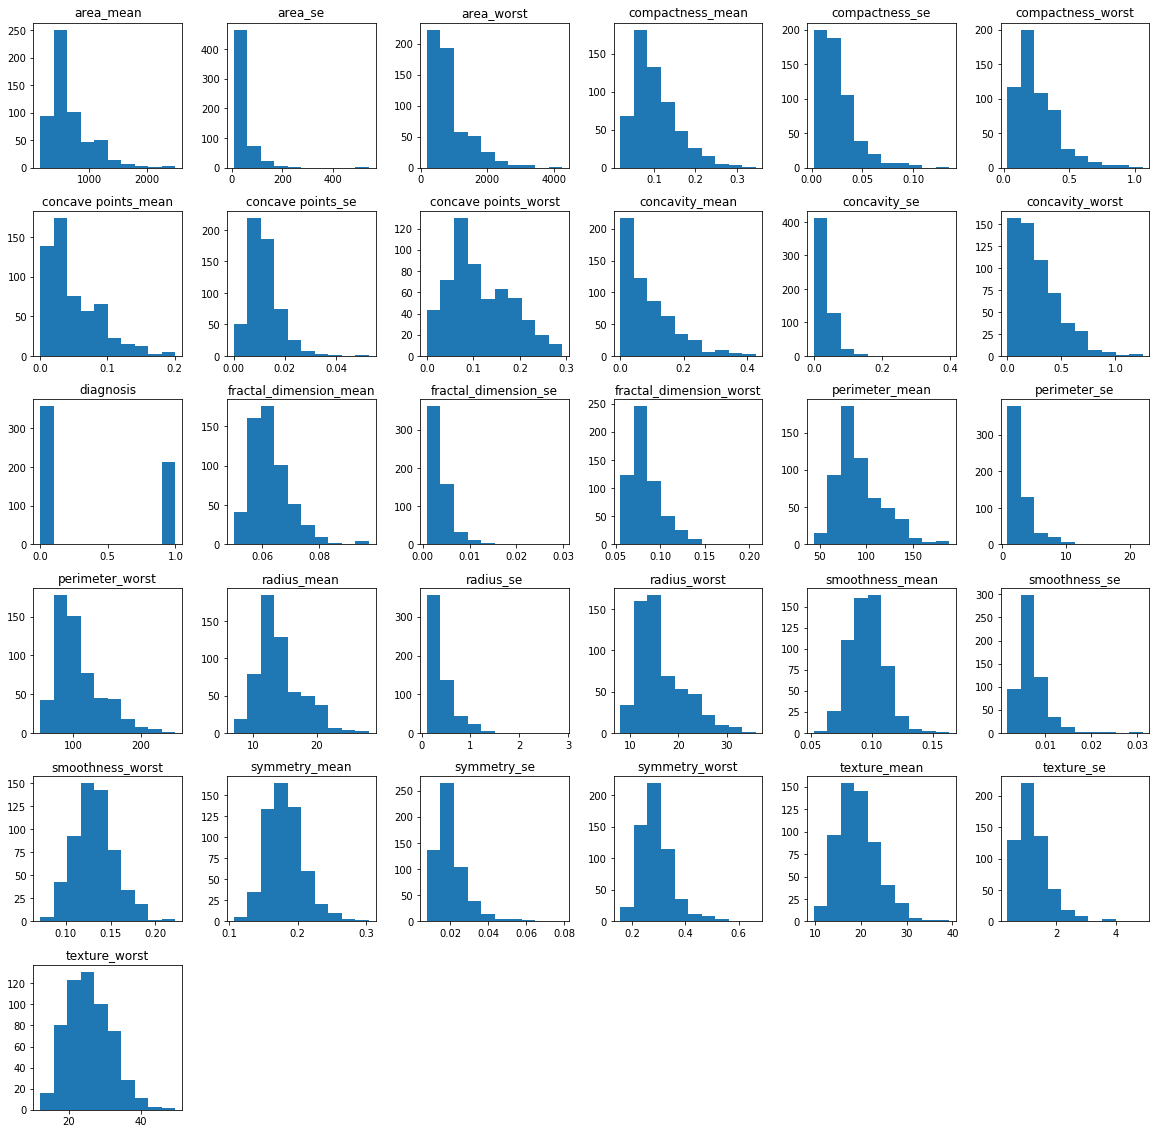

In [265]:
# Getting insight of data distribution based on frequency of unique values in the features
df_brcancer.hist(bins=10,figsize=(20,20),grid=False)

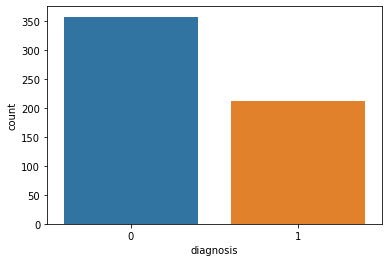

In [261]:
# 357 benign (1), 212 malignant (0)
sns.countplot(df_brcancer['diagnosis'], label = "Count") 

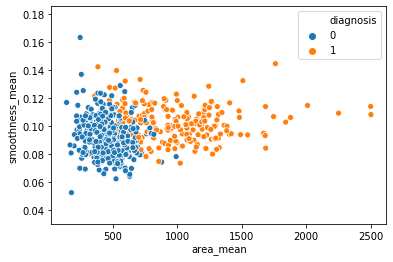

In [262]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = df_brcancer)

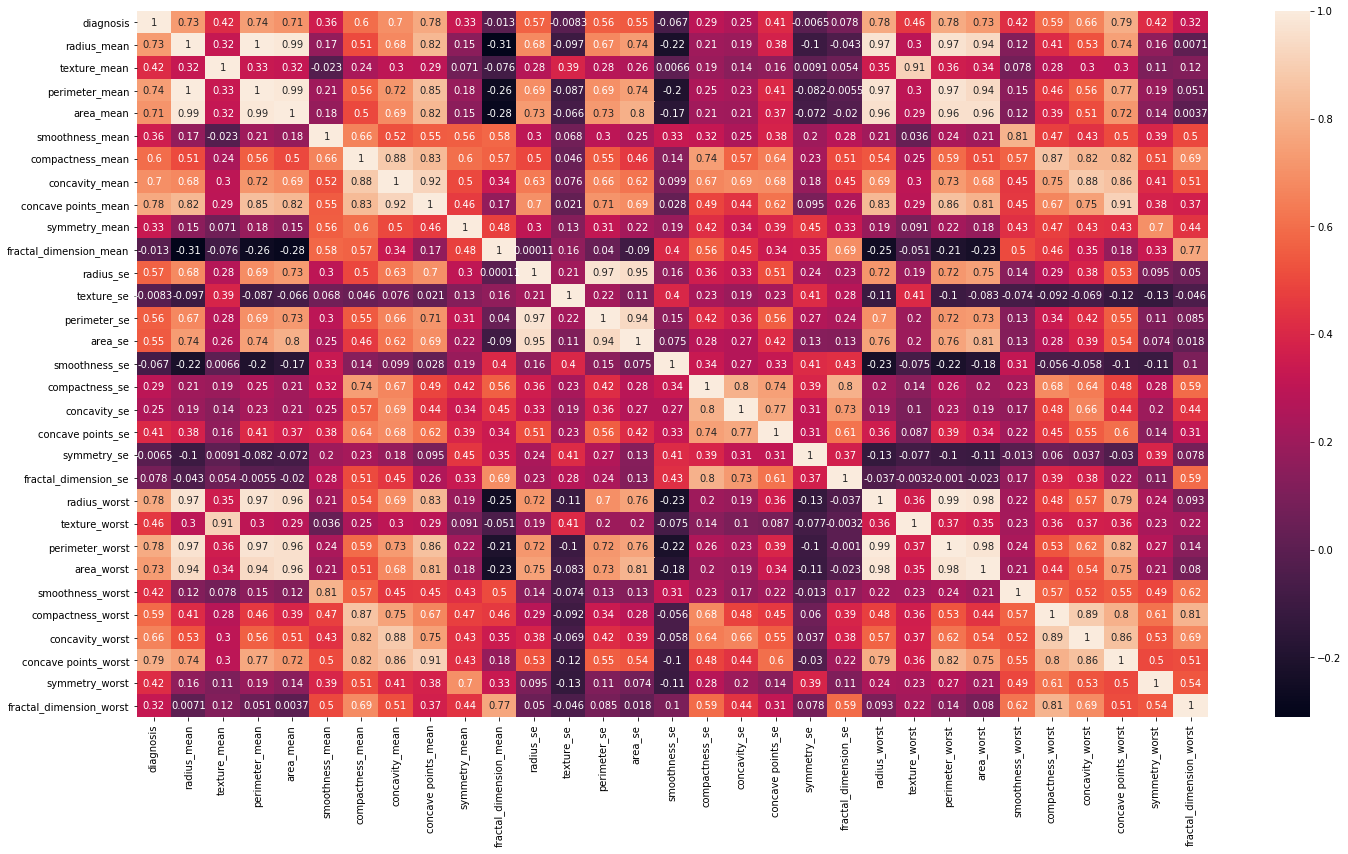

In [300]:
# correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(24,13)) 
sns.heatmap(df_brcancer.corr(), annot=True) 

# 5. MODEL TRAINING 

In [266]:
# drop the target label coloumns
X = df_brcancer.drop(['diagnosis'],axis=1)

In [267]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,"1,001.00",0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,"2,019.00",0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,"1,326.00",0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,"1,956.00",0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,"1,203.00",0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,"1,709.00",0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,"1,297.00",0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,"1,575.00",0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,"1,479.00",0.11,0.12,0.24,0.14,0.17,0.06,1.18,1.26,7.67,158.70,0.01,0.03,0.05,0.02,0.01,0.00,25.45,26.40,166.10,"2,027.00",0.14,0.21,0.41,0.22,0.21,0.07
565,20.13,28.25,131.20,"1,261.00",0.10,0.10,0.14,0.10,0.18,0.06,0.77,2.46,5.20,99.04,0.01,0.02,0.04,0.02,0.02,0.00,23.69,38.25,155.00,"1,731.00",0.12,0.19,0.32,0.16,0.26,0.07
566,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,0.46,1.07,3.42,48.55,0.01,0.04,0.05,0.02,0.01,0.00,18.98,34.12,126.70,"1,124.00",0.11,0.31,0.34,0.14,0.22,0.08
567,20.60,29.33,140.10,"1,265.00",0.12,0.28,0.35,0.15,0.24,0.07,0.73,1.59,5.77,86.22,0.01,0.06,0.07,0.02,0.02,0.01,25.74,39.42,184.60,"1,821.00",0.17,0.87,0.94,0.27,0.41,0.12


In [268]:
# Define output values - this is the target
y = df_brcancer['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [269]:
# split the data using train_test_split from sklearn library
from sklearn.model_selection import train_test_split

# splitting the data into test and train / using 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

print(X_train.shape,' is the shape of Training Features')
print(y_train.shape,' is the shape of Training Lables')
print(X_test.shape,' is the shape of Testing Features')
print(y_test.shape,' is the shape of Testing Lables')

(455, 30)  is the shape of Training Features
(455,)  is the shape of Training Lables
(114, 30)  is the shape of Testing Features
(114,)  is the shape of Testing Lables


In [270]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

# Training model
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 6. EVALUATING THE MODEL

In [271]:
y_predict = svc_model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1])

In [272]:
#Get the accuracy score
accuracyscore=sm.accuracy_score(y_test, y_predict)
print('Accuracy score for test data:',str(accuracyscore))

Accuracy score for test data: 0.9385964912280702


Text(33.0, 0.5, 'predicted')

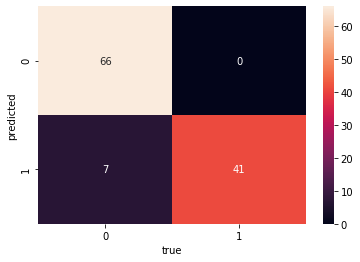

In [273]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
plt.xlabel('true') 
plt.ylabel('predicted')

In [274]:
print(classification_report(y_test, y_predict,target_names = ["Malignant","Benign"]))

              precision    recall  f1-score   support

   Malignant       0.90      1.00      0.95        66
      Benign       1.00      0.85      0.92        48

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



# 7. IMPROVING THE MODEL

In [275]:
# Perform normalisation:
min_train = X_train.min()
min_train

radius_mean                 6.98
texture_mean                9.71
perimeter_mean             43.79
area_mean                 143.50
smoothness_mean             0.05
compactness_mean            0.02
concavity_mean              0.00
concave points_mean         0.00
symmetry_mean               0.11
fractal_dimension_mean      0.05
radius_se                   0.11
texture_se                  0.36
perimeter_se                0.76
area_se                     6.80
smoothness_se               0.00
compactness_se              0.00
concavity_se                0.00
concave points_se           0.00
symmetry_se                 0.01
fractal_dimension_se        0.00
radius_worst                7.93
texture_worst              12.02
perimeter_worst            50.41
area_worst                185.20
smoothness_worst            0.07
compactness_worst           0.03
concavity_worst             0.00
concave points_worst        0.00
symmetry_worst              0.16
fractal_dimension_worst     0.06
dtype: flo

In [276]:
range_train = (X_train - min_train).max()
range_train

radius_mean                  21.13
texture_mean                 29.57
perimeter_mean              144.71
area_mean                 2,355.50
smoothness_mean               0.11
compactness_mean              0.33
concavity_mean                0.43
concave points_mean           0.20
symmetry_mean                 0.20
fractal_dimension_mean        0.05
radius_se                     2.76
texture_se                    4.52
perimeter_se                 21.22
area_se                     518.80
smoothness_se                 0.03
compactness_se                0.13
concavity_se                  0.40
concave points_se             0.05
symmetry_se                   0.07
fractal_dimension_se          0.03
radius_worst                 25.19
texture_worst                37.52
perimeter_worst             170.39
area_worst                3,246.80
smoothness_worst              0.13
compactness_worst             1.03
concavity_worst               1.10
concave points_worst          0.29
symmetry_worst      

In [277]:
X_train_scaled = (X_train - min_train)/range_train

In [278]:
X_train_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,0.29,0.21,0.28,0.17,0.29,0.10,0.00,0.02,0.29,0.20,0.03,0.05,0.02,0.02,0.07,0.04,0.00,0.05,0.08,0.06,0.26,0.22,0.24,0.14,0.32,0.10,0.01,0.09,0.26,0.19
410,0.21,0.27,0.20,0.11,0.32,0.10,0.07,0.10,0.27,0.20,0.03,0.26,0.03,0.01,0.13,0.06,0.03,0.11,0.08,0.02,0.20,0.65,0.20,0.10,0.57,0.13,0.16,0.30,0.33,0.15
197,0.53,0.41,0.51,0.37,0.19,0.21,0.26,0.29,0.36,0.08,0.19,0.21,0.17,0.13,0.13,0.38,0.15,0.27,0.19,0.14,0.47,0.34,0.46,0.32,0.13,0.16,0.23,0.32,0.19,0.07
376,0.17,0.36,0.18,0.08,0.34,0.45,0.53,0.30,0.57,0.75,0.00,0.19,0.08,0.00,0.23,0.56,0.39,0.55,0.12,0.39,0.12,0.29,0.15,0.05,0.33,0.32,0.55,0.50,0.25,0.43
244,0.59,0.47,0.59,0.43,0.45,0.42,0.48,0.44,0.46,0.22,0.15,0.32,0.15,0.10,0.30,0.23,0.10,0.30,0.20,0.10,0.54,0.49,0.55,0.38,0.58,0.26,0.31,0.54,0.32,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.28,0.41,0.30,0.16,0.67,0.53,0.44,0.46,0.65,0.52,0.07,0.14,0.08,0.03,0.14,0.25,0.09,0.23,0.19,0.10,0.30,0.50,0.33,0.17,0.77,0.50,0.49,0.71,0.67,0.34
73,0.32,0.21,0.32,0.19,0.43,0.33,0.18,0.25,0.30,0.34,0.06,0.06,0.06,0.03,0.10,0.14,0.04,0.17,0.06,0.08,0.34,0.24,0.35,0.19,0.54,0.32,0.25,0.48,0.24,0.31
400,0.52,0.38,0.56,0.36,0.64,0.73,0.75,0.60,0.53,0.46,0.11,0.09,0.11,0.07,0.19,0.26,0.16,0.20,0.11,0.14,0.51,0.42,0.58,0.34,0.90,0.55,0.82,0.67,0.40,0.42
118,0.42,0.45,0.43,0.27,0.57,0.48,0.50,0.47,0.52,0.51,0.16,0.16,0.13,0.10,0.24,0.28,0.15,0.26,0.10,0.17,0.49,0.49,0.47,0.33,0.88,0.45,0.67,0.70,0.41,0.46


#### Training Data without Scaling

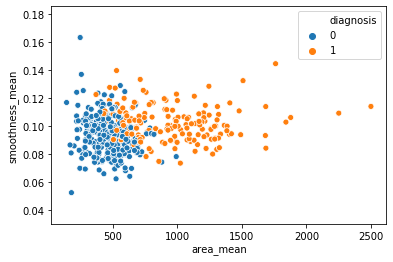

In [279]:
sns.scatterplot(x = X_train['area_mean'], y = X_train['smoothness_mean'], hue = y_train)

#### Training Data after Scaling

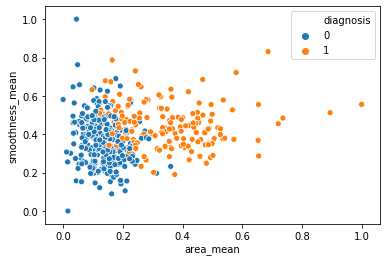

In [280]:
sns.scatterplot(x = X_train_scaled['area_mean'], y = X_train_scaled['smoothness_mean'], hue = y_train)

In [281]:
# normalisation for test data:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [282]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Text(33.0, 0.5, 'predicted')

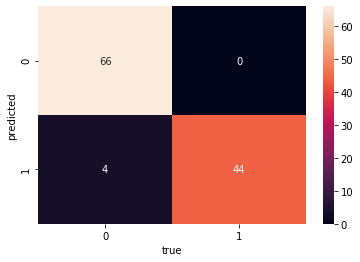

In [283]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('true') 
plt.ylabel('predicted')

In [284]:
#Get the accurasy score
accuracyscore=sm.accuracy_score(y_test, y_predict)
print('Accuracy score given for test data:',str(accuracyscore))

Accuracy score given for test data: 0.9649122807017544


In [285]:
print(classification_report(y_test,y_predict,target_names = ["Malignant","Benign"]))

              precision    recall  f1-score   support

   Malignant       0.94      1.00      0.97        66
      Benign       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### optimise c and gamma parameters


In [286]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [287]:
from sklearn.model_selection import GridSearchCV

In [288]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [289]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.956, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.945, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.879, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.868, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.648, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [290]:
# selecting  best values for c and gamma 
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [291]:
grid_predictions = grid.predict(X_test_scaled)

In [292]:
cm = confusion_matrix(y_test, grid_predictions)

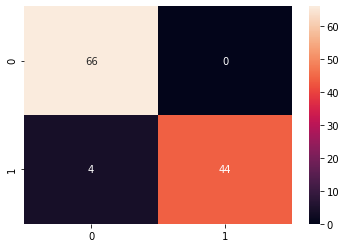

In [293]:
sns.heatmap(cm, annot=True)

In [294]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

